In [1]:
!unzip '/content/drive/My Drive/archive.zip' -d '/content/drive/My Drive/downloads'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10301.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10302.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10303.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10304.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10306.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/10307.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104017.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104018.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104019.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104021.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104023.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104024.png  
  inflating: /content/drive/My Drive/downloads/dhcd/train/7/104025.png  
  infl

In [0]:
import os
import shutil
import glob
import matplotlib.pyplot as plt
import pygal 
from IPython.display import display, HTML

In [3]:
pip install pygal

     |████████████████████████████████| 133kB 2.7MB/s 


In [6]:
train_data = "/content/drive/My Drive/downloads/dhcd/train"

#Create function to display interactive plotting
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

def galplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))
    
#Compare class distribution
line_chart = pygal.Bar(height=300)
line_chart.title = 'Total Dataset Distribution'
for o in os.listdir(train_data):
    line_chart.add(o, len(os.listdir(os.path.join(train_data, o))))
galplot(line_chart)

In [7]:
#Confirm Folder Structure
for root, dirs, files in os.walk(train_data):
    level = root.replace(os.getcwd(), '').count(os.sep)
    print('{0}{1}/'.format('    ' * level, os.path.basename(root)))
    for f in files[:2]:
        print('{0}{1}'.format('    ' * (level + 1), f))
    if level is not 0:
        print('{0}{1}'.format('    ' * (level + 1), "..."))  

                    train/
                        ...
                        0/
                            103265.png
                            103266.png
                            ...
                        1/
                            12397.png
                            12398.png
                            ...
                        10/
                            10962.png
                            10965.png
                            ...
                        11/
                            13203.png
                            13204.png
                            ...
                        12/
                            11886.png
                            11887.png
                            ...
                        13/
                            11972.png
                            11973.png
                            ...
                        14/
                            12040.png
                            12041.png
                         

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions

WIDTH=32
HEIGHT=32
BATCH_SIZE=128
test_dir = '/content/drive/My Drive/downloads/dhcd/test'
train_dir = '/content/drive/My Drive/downloads/dhcd/train'
val_dir = '/content/drive/My Drive/downloads/dhcd/test'

#Train DataSet Generator with Augmentation
print("\nTraining Data Set")
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_flow = train_generator.flow_from_directory(
    train_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Validation DataSet Generator with Augmentation
print("\nValidation Data Set")
val_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
val_flow = val_generator.flow_from_directory(
    val_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)

#Test DataSet Generator with Augmentation
print("\nTest Data Set")
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    test_dir,
    target_size=(HEIGHT, WIDTH),
    batch_size = BATCH_SIZE
)


Training Data Set
Found 78200 images belonging to 46 classes.

Validation Data Set
Found 13800 images belonging to 46 classes.

Test Data Set
Found 13800 images belonging to 46 classes.


In [0]:
from __future__ import division, print_function, absolute_import
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Convolution2D, MaxPooling2D, Dropout
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(Convolution2D(64, kernel_size=3, activation='relu', input_shape=(WIDTH,HEIGHT,3)))
#model.add(Convolution2D(100, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Convolution2D(250, 5, 5, border_mode='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(46))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_5 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 250)       400250    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 250)         0         
_________________________________________________________________
activation_6 (Activation)    (None, 5, 5, 250)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6250)             

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(250, (5, 5), padding="valid")`
  


In [15]:
import math
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
top_layers_file_path="/content/drive/My Drive/downloads/dhcd/model.h5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='/content/drive/My Drive/downloads/dhcd/logs', batch_size=val_flow.batch_size, write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('/content/drive/My Drive/downloads/dhcd/logs/iv3-log.csv', append=True)

history = model.fit_generator(train_flow, 
                              epochs=12, 
                              verbose=1,
                              validation_data=val_flow,
                              validation_steps=math.ceil(val_flow.samples/val_flow.batch_size),
                              steps_per_epoch=math.ceil(train_flow.samples/train_flow.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])

Epoch 1/12
  1/611 [..............................] - ETA: 32:25 - loss: 3.8459 - acc: 0.0234WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1265: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

611/611 [==============================] - 839s 1s/step - loss: 0.8627 - acc: 0.7663 - val_loss: 0.1773 - val_acc: 0.9460

Epoch 00001: loss improved from inf to 0.86278, saving model to /content/drive/My Drive/downloads/dhcd/model.h5
Epoch 2/12
611/611 [==============================] - 824s 1s/step - loss: 0.2691 - acc: 0.9213 - val_loss: 0.1245 - val_acc: 0.9618

Epoch 00002: loss improved from 0.86278 to 0.26904, saving model to /content/drive/My Drive/downloads/dhcd/model.h5
Epoch 3/12
611/611 [==============================] - 816s 1s/step - loss: 0.1625 - acc: 0.9523 - val_loss: 0.0952 - val_acc: 0.9717

Epoch 00003: loss improved from 0.26904 to 0.16250, saving model to /content/drive/My Drive/downloads/dhcd/model.h5
Epoch 4

In [16]:
model.save('/content/drive/My Drive/downloads/dhcd/model.h5')
model.load_weights('/content/drive/My Drive/downloads/dhcd/model.h5')
loss, acc = model.evaluate_generator(
    test_flow,
    verbose = True,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
print("Loss: ", loss)
print("Acc: ", acc)

108/108 [==============================] - 42s 387ms/step
Loss:  0.06301186461642762
Acc:  0.9860144927536232


In [0]:
label = [k for k,v in train_flow.class_indices.items()]
with open('/content/drive/My Drive/downloads/dhcd/logs/iv3-labels.txt', 'w+') as file:
    file.write("\n".join(label))

In [23]:
from keras.preprocessing import image
import numpy as np
import os
import glob
import random

import numpy as np
# import the monthly average values from `avg-monthly-precip.txt` as a numpy array
avg_monthly_precip = np.genfromtxt("/content/drive/My Drive/downloads/dhcd/logs/iv3-labels.txt",dtype='str')
label=avg_monthly_precip
    
file_list = glob.glob("/content/drive/My Drive/downloads/dhcd/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
#print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("/content/drive/My Drive/downloads/labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  0

Top 3 confidence: 0.99801505 0.0014175477 0.0004772328
Top 3 labels: 0 7 8
['0', '0', '०', "Śūn'ya", 'DIGIT\n']


In [30]:
from tensorflow.python.framework import graph_util
from tensorflow.python.framework import graph_io
from keras import backend as K
from keras import optimizers, models

top_layers_file_path="/content/drive/My Drive/downloads/dhcd/model.h5"
input_model_path = top_layers_file_path
output_model_name = "/content/drive/My Drive/downloads/dhcd/top_layers.iv3.pb"
output_model_dir = "/content/drive/My Drive/downloads/dhcd/tf_model"

K.set_learning_phase(0)
sess = K.get_session()

test_model = models.load_model(input_model_path)
orig_output_node_names = [node.op.name for node in test_model.outputs]

constant_graph = graph_util.convert_variables_to_constants(
    sess,
    sess.graph.as_graph_def(),
    orig_output_node_names)
graph_io.write_graph(
    constant_graph,
    output_model_dir,
    output_model_name,
    as_text=False)

INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


'/content/drive/My Drive/downloads/dhcd/top_layers.iv3.pb'

In [31]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/downloads/dhcd/model.h5')

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
#Test DataSet Generator with Augmentation
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_flow = test_generator.flow_from_directory(
    '/content/drive/My Drive/downloads/dhcd/test',
    shuffle=False,
    target_size=(32, 32),
    batch_size = 32
)

Found 13800 images belonging to 46 classes.


In [33]:
import math
import numpy as np
predictions = model.predict_generator(
    test_flow,
    verbose=1,
    steps=math.ceil(test_flow.samples/test_flow.batch_size))
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test_flow.classes
class_labels = list(test_flow.class_indices.keys())


432/432 [==============================] - 45s 104ms/step
[[9.9999976e-01 7.5990279e-08 5.4626889e-14 ... 1.6159280e-08
  6.2284755e-08 3.8565791e-12]
 [1.0000000e+00 1.0348550e-12 7.6216688e-21 ... 9.2187133e-11
  1.0381546e-12 8.1359227e-18]
 [1.0000000e+00 3.6302274e-15 5.5476137e-22 ... 2.1938657e-12
  1.0982346e-12 2.7735531e-17]
 ...
 [3.4053019e-24 2.9413165e-23 2.9044718e-27 ... 9.7510243e-19
  1.8570868e-19 1.0000000e+00]
 [8.8404225e-19 1.7929939e-12 4.6013441e-22 ... 7.3968126e-15
  4.2341816e-18 1.0000000e+00]
 [2.9300799e-26 6.9332240e-23 1.3464791e-30 ... 1.1085390e-22
  2.3038501e-26 1.0000000e+00]]


In [0]:
label = [k for k,v in train_flow.class_indices.items()]
with open('/content/drive/My Drive/downloads/dhcd/top_layers.txt', 'w+') as file:
    file.write("\n".join(label))

In [39]:
from keras.preprocessing import image
import numpy as np
import glob
import os
from keras import models
from keras.applications.inception_v3 import preprocess_input
import random

file_list = glob.glob("/content/drive/My Drive/downloads/dhcd/test/*/*")
img_path = random.choice(file_list)
img_cat = os.path.split(os.path.dirname(img_path))[1]
print("Image Category: ", img_cat)
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print("Raw Predictions: ", preds)

top_x = 3
top_args = preds[0].argsort()[-top_x:][::-1]
preds_label = [label[p] for p in top_args]
print("\nTop " + str(top_x) + " confidence: " + " ".join(map(str, sorted(preds[0])[-top_x:][::-1])))
print("Top " + str(top_x) + " labels: " + " ".join(map(str, preds_label)))

number=preds_label[0]
#loop through csv list
with open("/content/drive/My Drive/downloads/labels.csv") as f:
    for l, i in enumerate(f):
        data = i.split(",")
        if data[0] == number:
            print(data)

Image Category:  15
Raw Predictions:  [[1.48803591e-11 1.00638790e-13 2.50605201e-15 4.37772648e-12
  1.28341310e-15 5.42946460e-12 5.82705217e-09 9.99999762e-01
  9.01137585e-12 2.08368201e-11 5.85477283e-12 3.94887512e-10
  2.52682680e-10 5.20472825e-13 3.88441178e-15 2.23855906e-10
  1.49300101e-13 7.19506038e-14 9.72166226e-15 1.74922035e-10
  2.01687356e-09 2.72419385e-07 1.36959425e-14 4.00238816e-13
  2.31006148e-08 5.11675798e-14 2.90956235e-11 2.30946528e-13
  1.61084575e-14 2.42027353e-11 6.61813323e-13 1.61313400e-13
  3.44767097e-12 4.47755982e-12 1.57901510e-13 1.60920218e-11
  8.21932529e-13 2.05397114e-13 3.25314164e-10 1.29141827e-11
  4.19823807e-16 6.39595636e-13 4.11953360e-09 5.70258181e-11
  1.12295461e-14 2.18238084e-11]]

Top 3 confidence: 0.99999976 2.7241938e-07 2.3100615e-08
Top 3 labels: 15 28 30
['15', 'cha', 'च', 'ca', 'CONSONANT\n']


0 : 0
1 : 1
2 : 10
3 : 11
4 : 12
5 : 13
6 : 14
7 : 15
8 : 16
9 : 17
10 : 18
11 : 19
12 : 2
13 : 20
14 : 21
15 : 22
16 : 23
17 : 24
18 : 25
19 : 26
20 : 27
21 : 28
22 : 29
23 : 3
24 : 30
25 : 31
26 : 32
27 : 33
28 : 34
29 : 35
30 : 36
31 : 37
32 : 38
33 : 39
34 : 4
35 : 40
36 : 41
37 : 42
38 : 43
39 : 44
40 : 45
41 : 5
42 : 6
43 : 7
44 : 8
45 : 9


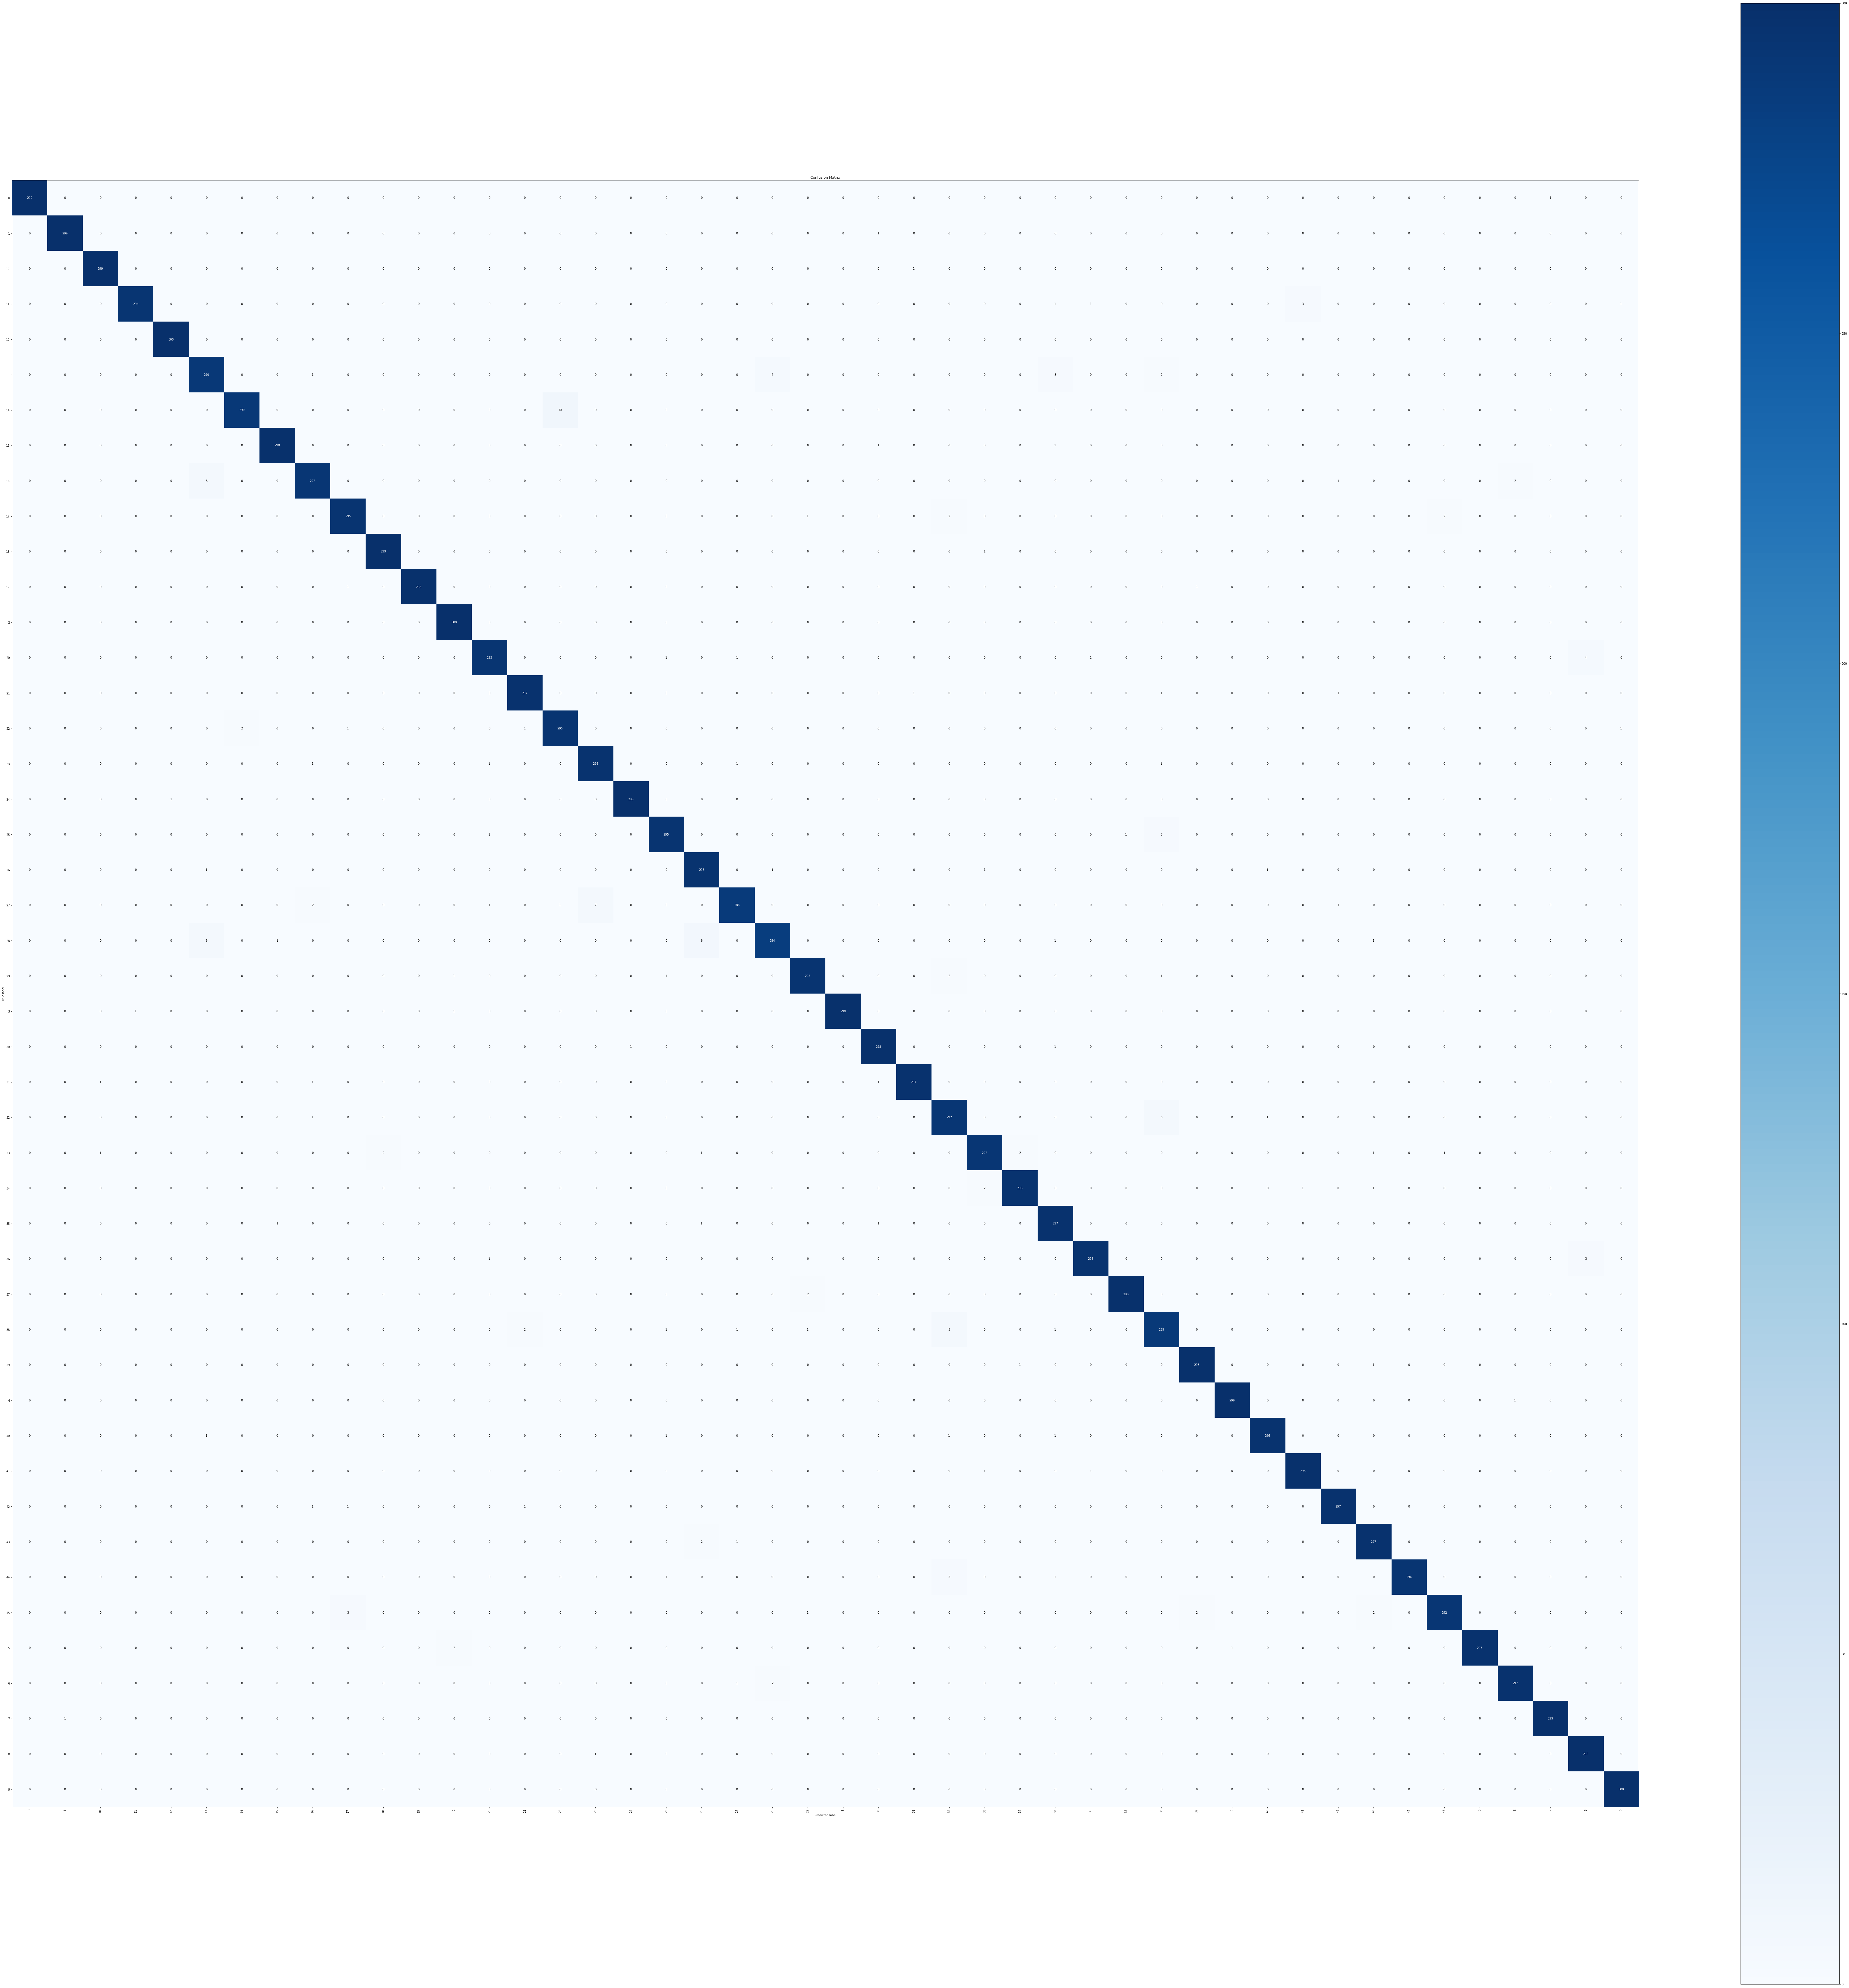

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline  
import scikitplot as skplt

[print(k, ":", v) for k,v in enumerate(class_labels)]
true_map_classes = [class_labels[x] for x in true_classes]
predicted_map_classes = [class_labels[x] for x in predicted_classes]

skplt.metrics.plot_confusion_matrix(
    true_map_classes, 
    predicted_map_classes,
    labels=class_labels,
    x_tick_rotation=90,
    figsize=(125,125))

In [44]:
from sklearn.metrics import classification_report
report = classification_report(
    true_classes,
    predicted_classes,
    target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
          10       0.99      1.00      1.00       300
          11       1.00      0.98      0.99       300
          12       1.00      1.00      1.00       300
          13       0.96      0.97      0.96       300
          14       0.99      0.97      0.98       300
          15       0.99      0.99      0.99       300
          16       0.98      0.97      0.97       300
          17       0.98      0.98      0.98       300
          18       0.99      1.00      1.00       300
          19       1.00      0.99      1.00       300
           2       0.99      1.00      0.99       300
          20       0.99      0.98      0.98       300
          21       0.99      0.99      0.99       300
          22       0.96      0.98      0.97       300
          23       0.97      0.99      0.98       300
          24       1.00    

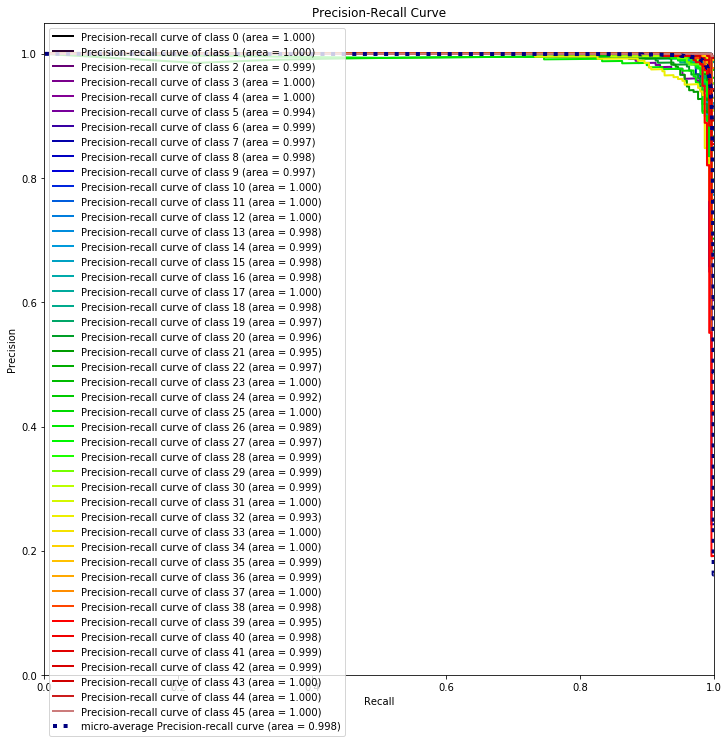

In [45]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    true_classes,
    predictions,
    figsize=(12,12))

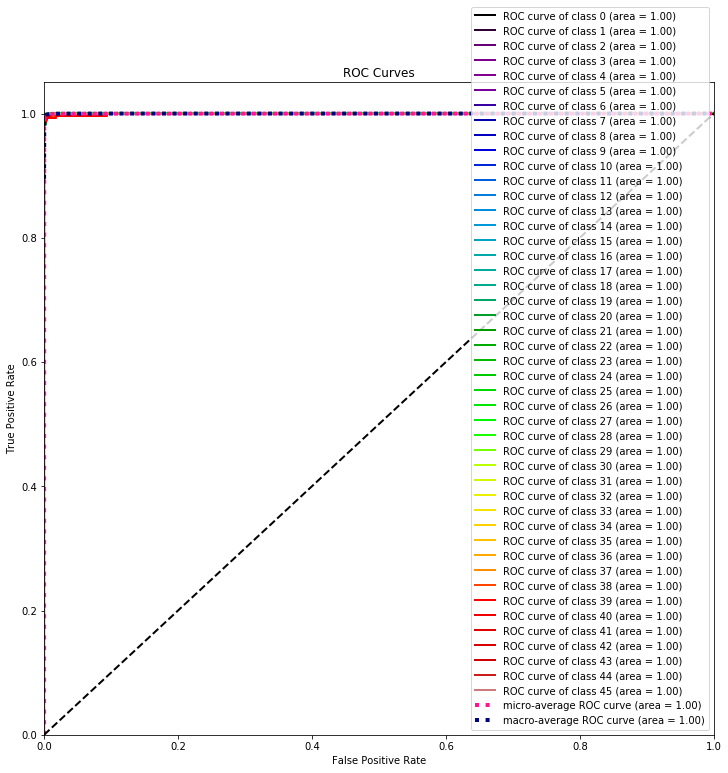

In [46]:
skplt.metrics.plot_roc(
    true_classes,
    predictions,
    figsize=(12,12))